<font size="6">**Problem Extension: Causal Inference in Vehicle Insurance for Fraud Detection**</font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("fraud_oracle.csv")

In [3]:
fraud = df[df["FraudFound_P"]== 1]
len(fraud)

923

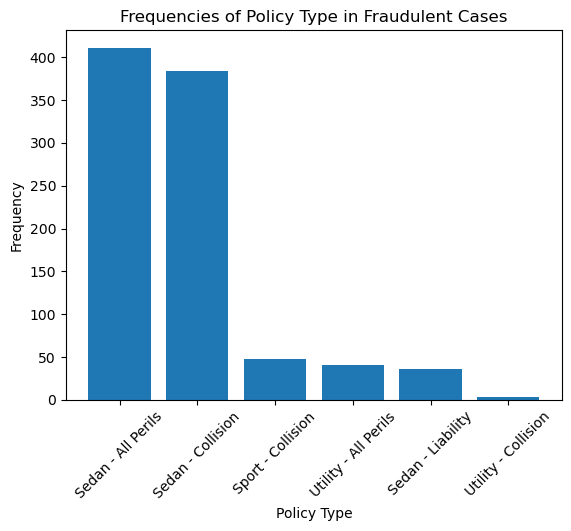

Sedan - All Perils      411
Sedan - Collision       384
Sport - Collision        48
Utility - All Perils     41
Sedan - Liability        36
Utility - Collision       3
Name: PolicyType, dtype: int64


In [4]:
# count the frequency of each value in the column
value_counts = fraud['PolicyType'].value_counts()

# create a bar plot of the value counts
plt.bar(value_counts.index, value_counts.values)

# add labels and title
plt.xlabel('Policy Type')
plt.ylabel('Frequency')
plt.title('Frequencies of Policy Type in Fraudulent Cases')

# rotate x-axis labels
plt.xticks(rotation=45)

# show the plot
plt.show()
print(value_counts)

<font size="4">**Defining the treatment variable**</font>

In [5]:
# Turning Policy Type into a binary variable
df['PolicyType'] = df['PolicyType'].apply(lambda x: 1 if x == "Sedan - All Perils" 
                                          or x == "Sedan - Collision" else 0)


<font size="4">**Causal inference exploration**</font>

In [6]:
df.columns

Index(['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice', 'FraudFound_P', 'PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy'],
      dtype='object')

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  int64 
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

<font size="4">**Y variable**</font>

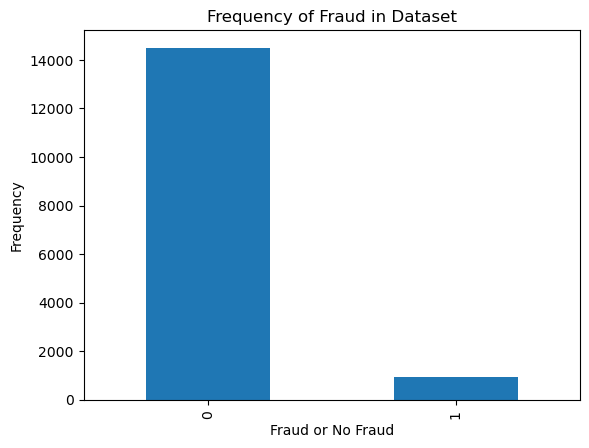

0    14497
1      923
Name: FraudFound_P, dtype: int64


In [8]:
# plot the frequency of values
df['FraudFound_P'].value_counts().plot(kind='bar')

# add title and labels
plt.title('Frequency of Fraud in Dataset')
plt.xlabel('Fraud or No Fraud')
plt.ylabel('Frequency')

# show plot
plt.show()
print(df['FraudFound_P'].value_counts())

<font size="4">**Distribution of numerical variables**</font>

In [9]:
num = ['WeekOfMonth','WeekOfMonthClaimed','Age','FraudFound_P','PolicyNumber','RepNumber','Deductible','DriverRating','Year']

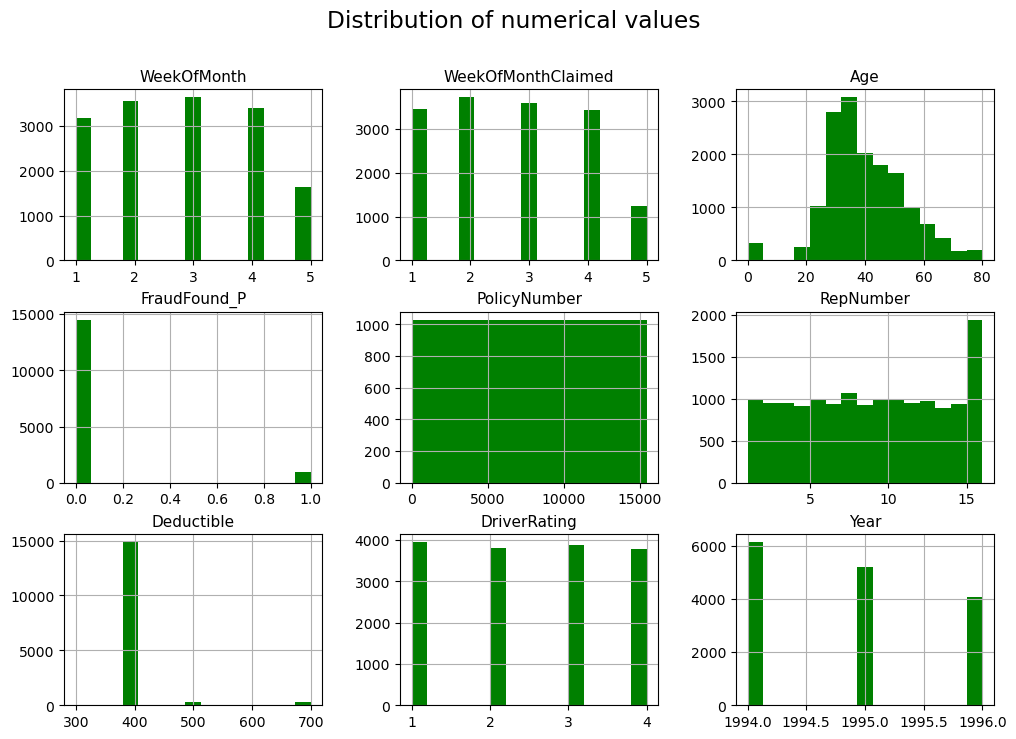

In [10]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=10, titlesize=11)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)


df[num].hist(bins=15, figsize=(12, 8), color="green")
plt.suptitle("Distribution of numerical values")
plt.show()

<font size="4">**Analysis of confounded variables**</font>

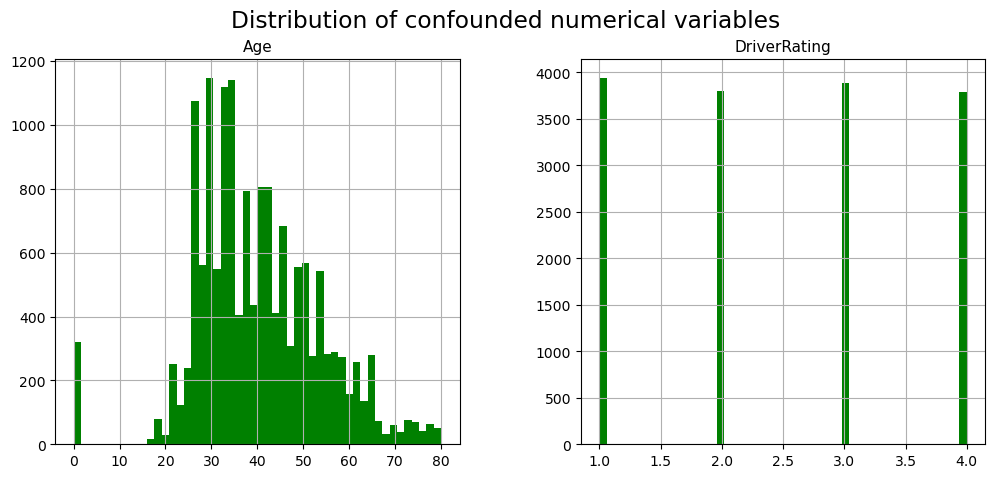

In [11]:
df[['Age','DriverRating']].hist(bins=50, figsize=(12, 5), color="green")
plt.suptitle("Distribution of confounded numerical variables")
plt.show()

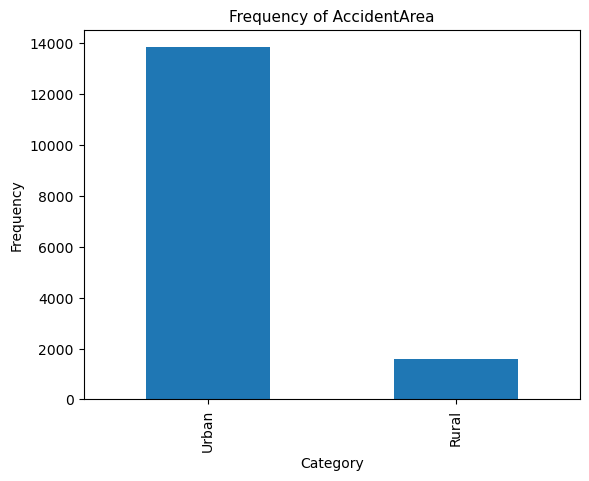

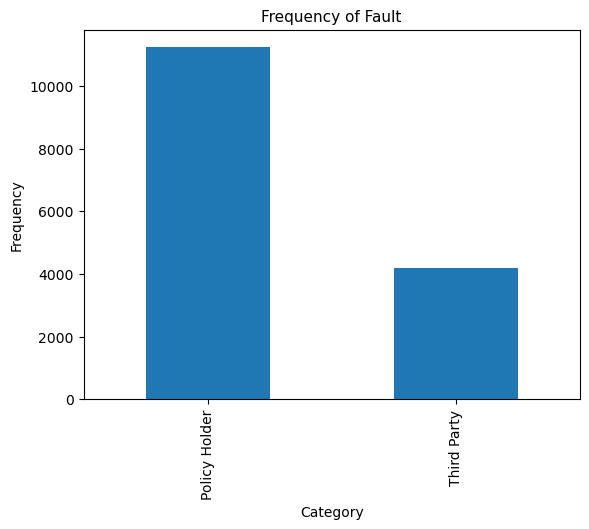

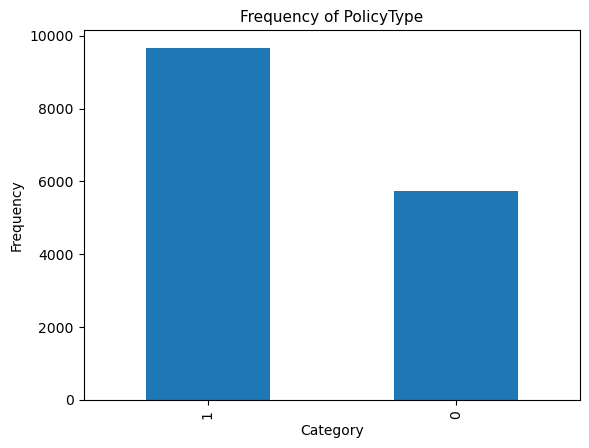

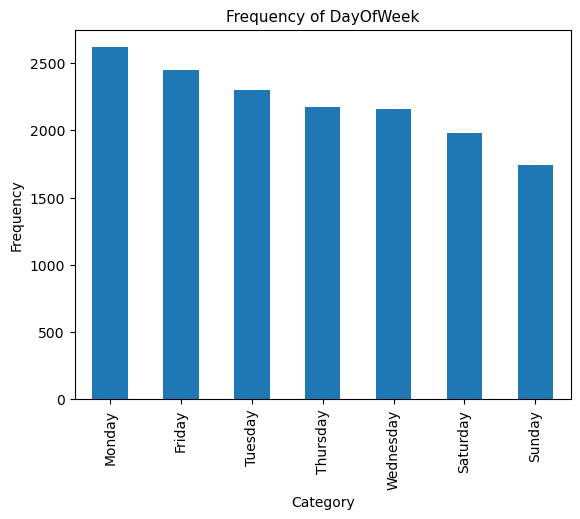

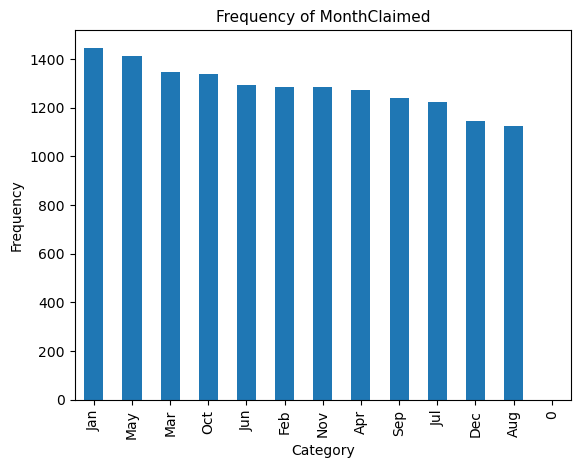

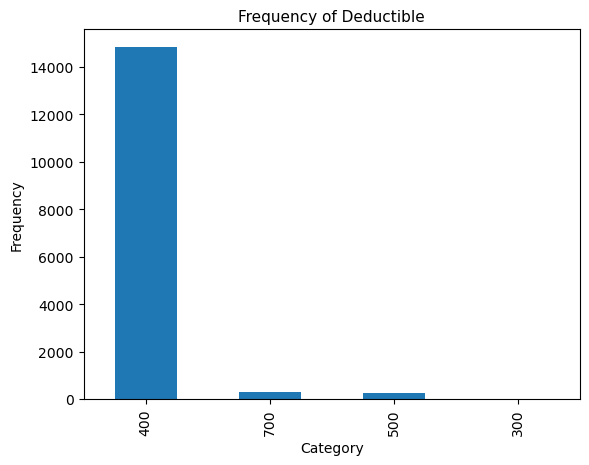

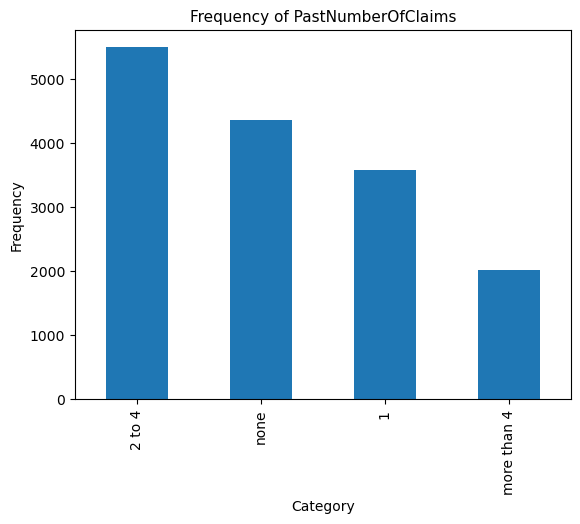

In [12]:
confounded = ['AccidentArea','Fault','PolicyType','DayOfWeek','MonthClaimed','Deductible','PastNumberOfClaims']

for c in confounded:
    # plot the frequency of values
    df[c].value_counts().plot(kind='bar')

    # add title and labels
    plt.title('Frequency of '+c)
    plt.xlabel('Category')
    plt.ylabel('Frequency')

    # show plot
    plt.show()
    #print(df['FraudFound_P'].value_counts())

<font size="4">**Treatment**</font>

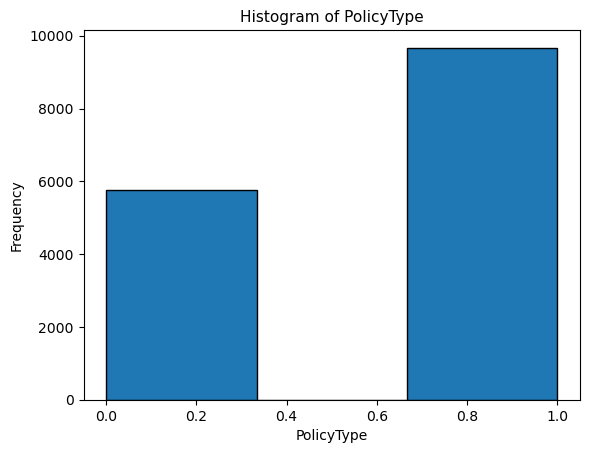

In [13]:
import matplotlib.pyplot as plt

plt.hist(df['PolicyType'], bins=3, edgecolor='k')
plt.xlabel('PolicyType')
plt.ylabel('Frequency')
plt.title('Histogram of ' + 'PolicyType')
plt.show()


<font size="4">**Correlation matrix**</font>

In [14]:
corr_matrix = df.corr()
corr_matrix['FraudFound_P'].sort_values(ascending=False)

FraudFound_P          1.000000
PolicyType            0.122182
Deductible            0.017348
DriverRating          0.007266
WeekOfMonthClaimed   -0.005761
RepNumber            -0.007551
WeekOfMonth          -0.011861
PolicyNumber         -0.020345
Year                 -0.024760
Age                  -0.029741
Name: FraudFound_P, dtype: float64

<AxesSubplot:>

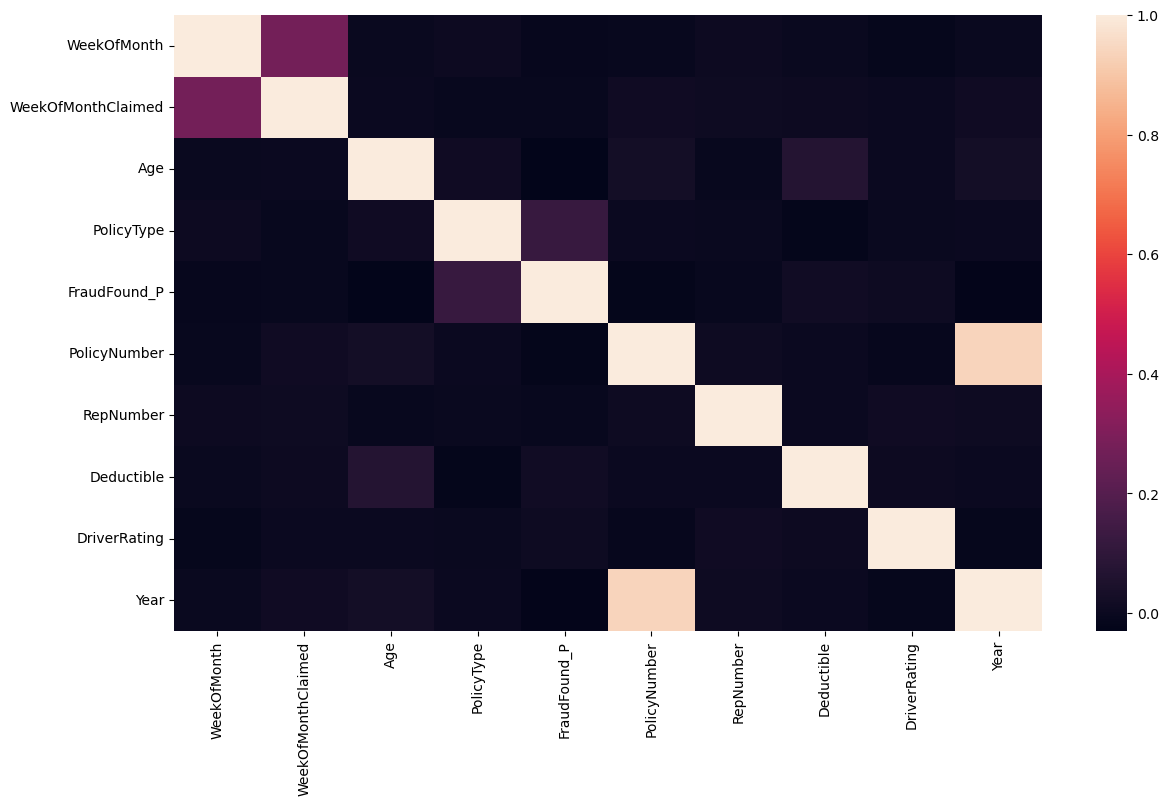

In [15]:
plt.figure(figsize=(14,8))
sns.heatmap(df.corr())

<font size="4">**Cleaning data and encoding**</font>

In [16]:
df = df.drop(columns=['PolicyNumber','RepNumber','Year'])

In [17]:
#does the comparision of value for age to the value of the AgeOfPolicyHolder
groupings = []
for holder in df['AgeOfPolicyHolder']:
    if 'to' in holder :
        temp = holder.split()
        nr=[int(temp[0]),int(temp[2])]
        groupings.append(nr)
    else :
        temp = holder.split()
        nr = [int(temp[1]),129]
        groupings.append(nr)
                        
age_idx = []
rw_idx = []

#Assigns an age of 16.5 to all rows with missing Age values
data_age0_idx = (df['Age']==0)
df.loc[list(data_age0_idx),'Age']=16.5

df=df.drop(columns=['AgeOfPolicyHolder'])

In [18]:
#!pip install category_encoders
from category_encoders.ordinal import OrdinalEncoder
col_ordering = [{'col':'Month','mapping':{'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}},
    {'col':'DayOfWeek','mapping':{'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}},
    {'col':'DayOfWeekClaimed','mapping':{'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6,'Sunday':7}},
    {'col':'MonthClaimed','mapping':{'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}},
    {'col':'PastNumberOfClaims','mapping':{'none':0 ,'1':1,'2 to 4':2,'more than 4':5 }},
    {'col':'NumberOfSuppliments','mapping':{'none':0,'1 to 2':1,'3 to 5':3,'more than 5':6}}, 
    {'col':'VehiclePrice','mapping':{'more than 69000':69001,'20000 to 29000':24500,'30000 to 39000':34500,'less than 20000':19999,
                                     '40000 to 59000':49500,'60000 to 69000':64500}},
    {'col':'Days_Policy_Accident','mapping':{'none':0,'1 to 7':1,'8 to 15':2, '15 to 30':3, 'more than 30':4}},
     {'col':'Days_Policy_Claim','mapping':{'more than 30':30,'15 to 30':22.5,'8 to 15':11.5,'none':0}},
    {'col':'NumberOfCars','mapping':{'1 vehicle':1, '2 vehicles':2, '3 to 4':3, '5 to 8':4, 'more than 8':5}},
    {'col':'AddressChange_Claim','mapping':{'no change':0, 'under 6 months':1, '1 year':2, '2 to 3 years':3, '4 to 8 years':4}},
    {'col':'AgeOfVehicle','mapping':{'3 years':3,'6 years':6,'7 years':7,'more than 7':8,'5 years':5,'new':0,'4 years':4,'2 years':2}},
]
ord_encoder = OrdinalEncoder(mapping = col_ordering, return_df=True)

In [19]:
df_ordinal = df[['Month', 'DayOfWeek', 'DayOfWeekClaimed', 'MonthClaimed',"PastNumberOfClaims",'NumberOfSuppliments',
                    'VehiclePrice', 'Days_Policy_Accident','Days_Policy_Claim','NumberOfCars',
                    'AddressChange_Claim', 'AgeOfVehicle']]
X1 = ord_encoder.fit_transform(df_ordinal)


In [20]:
df_ord=df.drop(columns=['Month', 'DayOfWeek', 'DayOfWeekClaimed', 'MonthClaimed',"PastNumberOfClaims",'NumberOfSuppliments',
                    'VehiclePrice', 'Days_Policy_Accident', 'Days_Policy_Claim','NumberOfCars',
                    'AddressChange_Claim', 'AgeOfVehicle'])

In [21]:
df = pd.concat([X1,df_ord], axis=1, join='inner')

In [22]:
from sklearn.preprocessing import OneHotEncoder
#from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

def encoding (data):
  #Ordinal Encode
  #data_ordinal=['Month','DayOfWeek','DayOfWeekClaimed','MonthClaimed',
  #               'VehiclePrice','Days_Policy_Accident','Days_Policy_Claim',
  #               'PastNumberOfClaims','AgeOfVehicle','NumberOfSuppliments',
  #               'AddressChange_Claim','NumberOfCars']

  
  #Label Encode
  data_cat_label = data[['AccidentArea','Sex','Fault','PoliceReportFiled','WitnessPresent','AgentType']]
  label_encoder = preprocessing.LabelEncoder()
  for i in  data_cat_label:
    data[i] = label_encoder.fit_transform(data[i])
  
  #One hot Encode
  onehotencoder = OneHotEncoder(handle_unknown='ignore')
  data_hot_label = ['Make','MaritalStatus','VehicleCategory','BasePolicy']
  
  
#numeric
  min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
  data_num = ['WeekOfMonth','WeekOfMonthClaimed','Age','Deductible','DriverRating',
              'Month','DayOfWeek','DayOfWeekClaimed','MonthClaimed','VehiclePrice','Days_Policy_Accident','Days_Policy_Claim',
                 'PastNumberOfClaims','AgeOfVehicle','NumberOfSuppliments',
                 'AddressChange_Claim','NumberOfCars']
  data[data_num] = min_max_scaler.fit_transform(data[data_num])

  return data  

In [23]:
df_t= encoding(df)

In [24]:
df_s=df_t.drop(columns=['Make','MaritalStatus','VehicleCategory','BasePolicy'])

In [25]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder(sparse=False)
df_cat_hot = df_t[['Make','MaritalStatus','VehicleCategory','BasePolicy']]

pd.get_dummies(df_cat_hot)
cat_encoder.handle_unknown = "ignore"
cat_encoder.fit_transform(df_cat_hot)
cat_encoder.feature_names_in_
cat_encoder.get_feature_names_out()

df_t2= pd.DataFrame(cat_encoder.transform(df_cat_hot),
                         columns=cat_encoder.get_feature_names_out(),
                         index=df_cat_hot.index)
#y = data_train_t[['FraudFound_P']]
#y = pd.DataFrame(y,columns=['FraudFound_P'])
df = pd.concat([df_s,df_t2], axis=1, join='inner')
df.head()

,Month,DayOfWeek,DayOfWeekClaimed,MonthClaimed,PastNumberOfClaims,NumberOfSuppliments,VehiclePrice,Days_Policy_Accident,Days_Policy_Claim,NumberOfCars,...,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,MaritalStatus_Widow,VehicleCategory_Sedan,VehicleCategory_Sport,VehicleCategory_Utility,BasePolicy_All Perils,BasePolicy_Collision,BasePolicy_Liability
0,1.000000,-0.333333,-0.25,-0.692308,-1.0,-1.0,1.000000,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-1.000000,-0.333333,-0.50,-0.692308,-1.0,-1.0,1.000000,1.0,1.0,-1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.636364,0.333333,0.25,0.846154,-0.6,-1.0,1.000000,1.0,1.0,-1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,-0.090909,0.666667,0.50,0.230769,-0.6,1.0,-0.816293,1.0,1.0,-1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,-1.000000,-1.000000,-0.25,-0.538462,-1.0,-1.0,1.000000,1.0,1.0,-1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


<font size="4">**Outlier Detection**</font>

In [26]:
from numpy import where
from sklearn.ensemble import IsolationForest
def outlier (data):
  iforest = IsolationForest(n_estimators=100, random_state=42, contamination=0.02)
  pred = iforest.fit_predict(data)
  score = iforest.decision_function(data)
  anom_index = where(pred==-1)
  values = data.iloc[anom_index]
  data = data[~data.index.isin(values.index)]
  return data  

In [27]:
df = outlier(df)

C:\Users\ximen\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [28]:
df.columns

Index(['Month', 'DayOfWeek', 'DayOfWeekClaimed', 'MonthClaimed',
       'PastNumberOfClaims', 'NumberOfSuppliments', 'VehiclePrice',
       'Days_Policy_Accident', 'Days_Policy_Claim', 'NumberOfCars',
       'AddressChange_Claim', 'AgeOfVehicle', 'WeekOfMonth', 'AccidentArea',
       'WeekOfMonthClaimed', 'Sex', 'Age', 'Fault', 'PolicyType',
       'FraudFound_P', 'Deductible', 'DriverRating', 'PoliceReportFiled',
       'WitnessPresent', 'AgentType', 'Make_Accura', 'Make_BMW',
       'Make_Chevrolet', 'Make_Dodge', 'Make_Ferrari', 'Make_Ford',
       'Make_Honda', 'Make_Jaguar', 'Make_Lexus', 'Make_Mazda', 'Make_Mecedes',
       'Make_Mercury', 'Make_Nisson', 'Make_Pontiac', 'Make_Porche',
       'Make_Saab', 'Make_Saturn', 'Make_Toyota', 'Make_VW',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'MaritalStatus_Widow', 'VehicleCategory_Sedan',
       'VehicleCategory_Sport', 'VehicleCategory_Utility',
       'BasePolicy_All Perils', 'BasePolicy

<font size="4">**Feature Selection**</font>

In [29]:
X = df.drop(columns = ['FraudFound_P'])
y = df['FraudFound_P']

In [30]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(random_state=5)
forest_reg.fit(X,y)

# Displaying feature importance from Random Forest
features = pd.DataFrame(list(zip(X.columns,forest_reg.feature_importances_)), columns = ['predictor', 'feature importance']).sort_values(ascending=False, by = 'feature importance')
features

,predictor,feature importance
16,Age,0.141985
1,DayOfWeek,0.067873
2,DayOfWeekClaimed,0.060802
0,Month,0.059782
3,MonthClaimed,0.059035
12,WeekOfMonth,0.053503
14,WeekOfMonthClaimed,0.051630
20,DriverRating,0.048027
11,AgeOfVehicle,0.044953
4,PastNumberOfClaims,0.043491


In [31]:
# Dropping the variables with low importance
X.drop(columns=['Make_Lexus','Make_Ferrari','Make_Jaguar','Make_Porche'], inplace=True)


<font size="4">**Dealing with Imbalanced Dataset**</font>

In [32]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=42)
X_smoteen, y_smoteen = smote_enn.fit_resample(X, y)

In [33]:
y.value_counts()

0    14282
1      829
Name: FraudFound_P, dtype: int64

In [34]:
y_smoteen.value_counts()

1    14262
0    10105
Name: FraudFound_P, dtype: int64

<font size="4">**Creating Causal Model**</font>

In [35]:
#from sklearn.linear_model import LinearRegression
#from xgboost import XGBRegressor
from causalml.inference.meta import LRSRegressor
from causalml.inference.meta import XGBTRegressor, MLPTRegressor
#from causalml.inference.meta import BaseXRegressor, BaseRRegressor, BaseSRegressor, BaseTRegressor
#from causalml.match import NearestNeighborMatch, MatchOptimizer, create_table_one
#from causalml.propensity import ElasticNetPropensityModel
#from sklearn.ismpute import SimpleImputer

In [36]:
X.columns

Index(['Month', 'DayOfWeek', 'DayOfWeekClaimed', 'MonthClaimed',
       'PastNumberOfClaims', 'NumberOfSuppliments', 'VehiclePrice',
       'Days_Policy_Accident', 'Days_Policy_Claim', 'NumberOfCars',
       'AddressChange_Claim', 'AgeOfVehicle', 'WeekOfMonth', 'AccidentArea',
       'WeekOfMonthClaimed', 'Sex', 'Age', 'Fault', 'PolicyType', 'Deductible',
       'DriverRating', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'Make_Accura', 'Make_BMW', 'Make_Chevrolet', 'Make_Dodge', 'Make_Ford',
       'Make_Honda', 'Make_Mazda', 'Make_Mecedes', 'Make_Mercury',
       'Make_Nisson', 'Make_Pontiac', 'Make_Saab', 'Make_Saturn',
       'Make_Toyota', 'Make_VW', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'MaritalStatus_Widow',
       'VehicleCategory_Sedan', 'VehicleCategory_Sport',
       'VehicleCategory_Utility', 'BasePolicy_All Perils',
       'BasePolicy_Collision', 'BasePolicy_Liability'],
      dtype='object')

In [37]:
feature_names= ['Month', 'DayOfWeek', 'DayOfWeekClaimed', 'MonthClaimed',
       'PastNumberOfClaims', 'NumberOfSuppliments', 'VehiclePrice',
       'Days_Policy_Accident', 'Days_Policy_Claim', 'NumberOfCars',
       'AddressChange_Claim', 'AgeOfVehicle', 'WeekOfMonth', 'AccidentArea',
       'WeekOfMonthClaimed', 'Sex', 'Age', 'Fault', 'Deductible',
       'DriverRating', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'Make_Accura', 'Make_BMW', 'Make_Chevrolet', 'Make_Dodge', 'Make_Ford',
       'Make_Honda', 'Make_Mazda', 'Make_Mecedes', 'Make_Mercury',
       'Make_Nisson', 'Make_Pontiac', 'Make_Saab', 'Make_Saturn',
       'Make_Toyota', 'Make_VW', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'MaritalStatus_Widow',
       'VehicleCategory_Sedan', 'VehicleCategory_Sport',
       'VehicleCategory_Utility', 'BasePolicy_All Perils',
       'BasePolicy_Collision', 'BasePolicy_Liability']
X = X_smoteen.drop(columns = ['PolicyType'])
y = y_smoteen
treatment = X_smoteen['PolicyType']

<font size="4">**LRS and XGBT Regressor to estimate ATE**</font>

In [38]:
# Computing the Average Treatment Effect (ATE)

lr = LRSRegressor()
te, lb, ub = lr.estimate_ate(X, treatment, y)
print('Average Treatment Effect (Linear Regression): {:.2f} ({:.2f}, {:.2f})'.format(te[0], lb[0], ub[0]))


Average Treatment Effect (Linear Regression): -0.47 (-0.53, -0.42)


In [39]:
# Computing the Average Treatment Effect (ATE)

xg = XGBTRegressor(random_state=5)
te, lb, ub = xg.estimate_ate(X, treatment, y)
print('Average Treatment Effect (XGBoost): {:.2f} ({:.2f}, {:.2f})'.format(te[0], lb[0], ub[0]))

Average Treatment Effect (XGBoost): 0.10 (0.09, 0.10)


<font size="4">**Visualizing Results**</font>

<font size="3">**Feature importance with LGBM Regressor**</font>

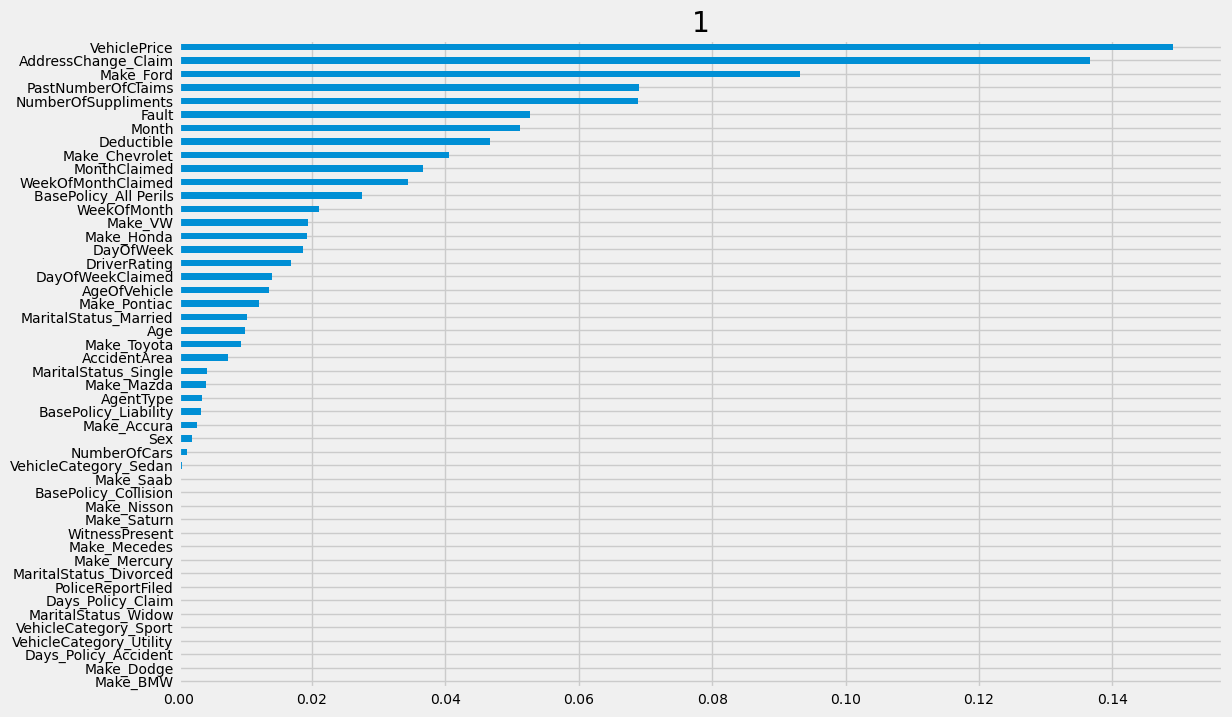

In [40]:
from causalml.inference.meta import BaseSRegressor, BaseTRegressor, BaseXRegressor, BaseRRegressor
from causalml.dataset.regression import synthetic_data
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor

slearner = BaseSRegressor(LGBMRegressor(), control_name=0)
slearner.estimate_ate(X, treatment, y)
slearner_tau = slearner.fit_predict(X, treatment, y)

model_tau_feature = RandomForestRegressor()  # specify model for model_tau_feature

slearner.get_importance(X=X, tau=slearner_tau, model_tau_feature=model_tau_feature,
                        normalize=True, method='auto', features=feature_names)

# Using the feature_importances_ method in the base learner (LGBMRegressor() in this example)
slearner.plot_importance(X=X, tau=slearner_tau, normalize=True, method='auto',features=feature_names)


<font size="3">**Feature importance with PermutationImportance Method**</font>

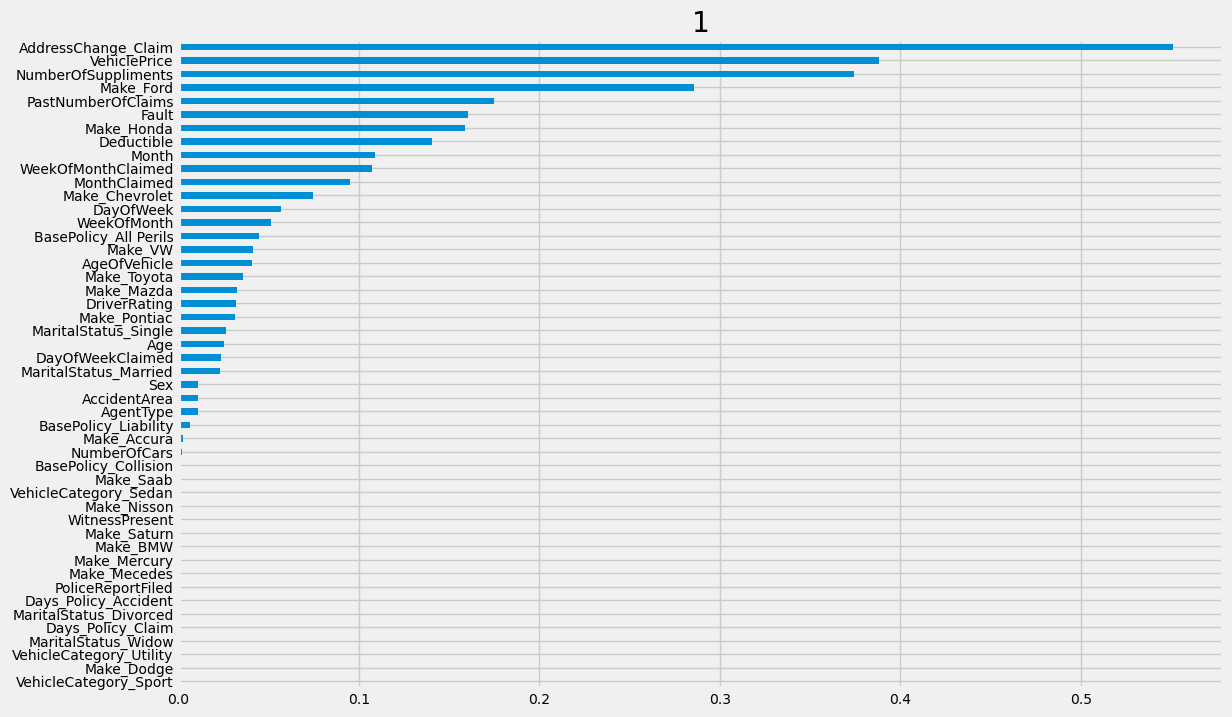

In [41]:
# Using eli5's PermutationImportance
slearner.plot_importance(X=X, tau=slearner_tau, normalize=True, method='permutation',features=feature_names)


<font size="3">**SHAP Values**</font>

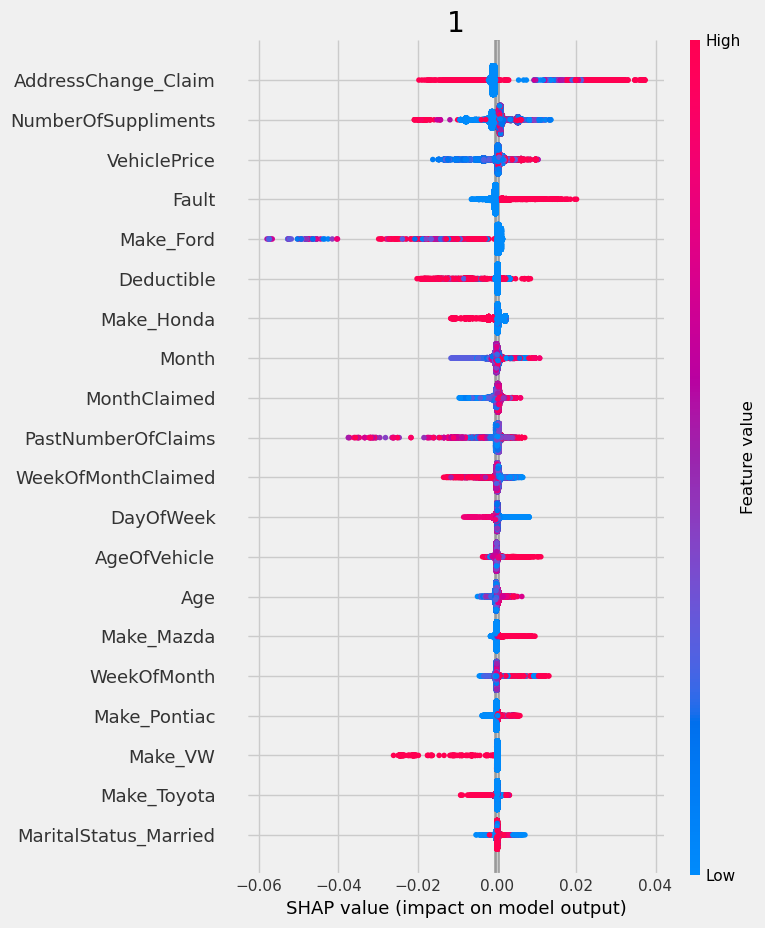

In [42]:
# Using SHAP
shap_slearner = slearner.get_shap_values(X=X, tau=slearner_tau)

# Plot shap values WITH specifying shap_dict
slearner.plot_shap_values(X=X, shap_dict=shap_slearner, features=feature_names)
